<a href="https://colab.research.google.com/github/sgr1118/sgr1118/blob/main/%5BExp_02%5D_Sklearn_Regressor_(diabetes%2C_bike)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-12. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [49]:
# (1) 데이터 가져오기
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import seaborn as sns
pd.set_option('max_rows',500)
pd.set_option('max_columns',30)

dataset=load_diabetes()
#dataset.feature_names # ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
feature = dataset.data
labels = dataset.target
diabetes_df = pd.DataFrame(data=feature, columns = dataset.feature_names)
diabetes_df['target'] = labels
diabetes_df
df_X = dataset.data
df_y = dataset.target

#df_X.columns # 'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6' 10개


In [50]:
# 상관관계 출력
corr_bar = []
for column in diabetes_df.columns[:] :
  
  print(f'{column}과 target의 상관관계 : {diabetes_df["target"].corr(diabetes_df[column])}\n')
  corr_bar.append(diabetes_df["target"].corr(diabetes_df[column]))

age과 target의 상관관계 : 0.1878887507189198

sex과 target의 상관관계 : 0.0430619984516054

bmi과 target의 상관관계 : 0.5864501344746891

bp과 target의 상관관계 : 0.4414838489308862

s1과 target의 상관관계 : 0.21202248101455076

s2과 target의 상관관계 : 0.17405358696874249

s3과 target의 상관관계 : -0.39478925067091847

s4과 target의 상관관계 : 0.4304528847447734

s5과 target의 상관관계 : 0.5658834252428094

s6과 target의 상관관계 : 0.3824834842485812

target과 target의 상관관계 : 1.0



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


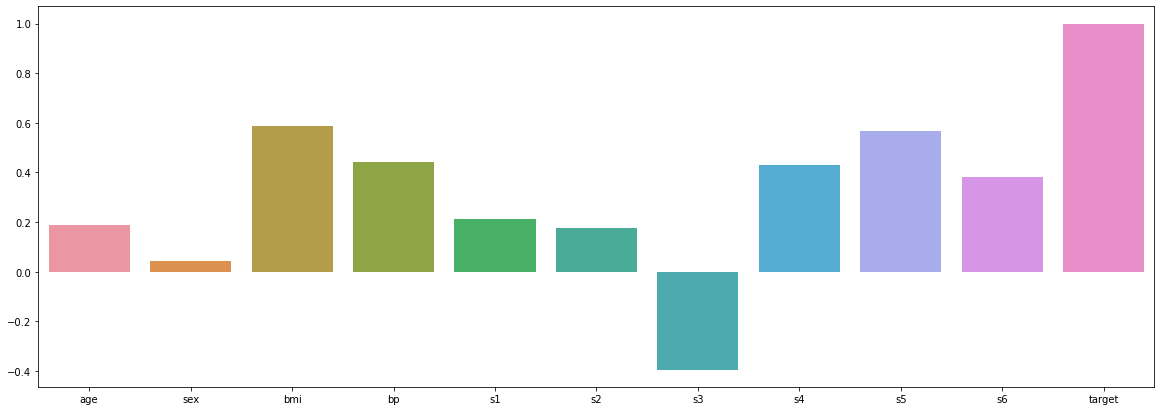

In [51]:
# count와 변수간 상관계수 시각화
plt.figure(figsize=(20,7))
sns.barplot(diabetes_df.columns, corr_bar)

# 양의 상관관계 : age, sex, bmi, bp, s1, s2, s4, s5, s6
# 음의 상관관계 : s3

# 추가적으로 변수를 삭제한 후 loss값을 출력해보았다.

In [27]:
# 음의 상관관계를 갖던 변수 제거
diabetes_df.drop(columns = 's3', inplace = True)

In [38]:
# 상관계수가 가장 낮은 변수 제거
diabetes_df.drop(columns = 'sex', inplace = True)

In [40]:
# 위에서 변수를 제거한 경우 사용
df_X = diabetes_df.iloc[:, :-1]
df_y = diabetes_df['target']

In [52]:
# (2), (3) 모델에 입력할 데이터 X, y 준비하기
X = np.array(df_X)
y = np.array(df_y)

In [53]:
# (4) train 데이터와 test 데이터로 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 10)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # (353, 10) (89, 10) (353,) (89,)

(353, 10) (89, 10) (353,) (89,)


In [54]:
# (5) 모델 준비하기
# 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
W = np.random.rand(10)
b = np.random.rand()

# 모델 함수를 구현해주세요.

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [55]:
# (6) 손실함수 los정의하기
# 손실함수를 MSE 함수로 정의해주세요.
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse  

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [56]:
# (7) 기울기를 구하는 gradient 함수 구현하기
# 기울기를 계산하는 gradient 함수를 구현해주세요
def gradient(X, W, b, y):
  # N은 가중치의 개수
  N = len(W)
    
  # y_pred 준비
  y_pred = model(X, W, b)
    
  # 공식에 맞게 gradient 계산
  dW = 1/N * 2 * X.T.dot(y_pred - y)
        
  # b의 gradient 계산
  db = 2 * (y_pred - y).mean()
  return dW, db

dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.53490669  -13.69076973 -189.44428859 -142.54383015  -68.06165745
  -55.82955198  127.61423964 -138.84647552 -182.6713594  -123.32976107]
db: -302.35553105317473


Iteration 200 : Loss 3591.1274
Iteration 400 : Loss 3198.5416
Iteration 600 : Loss 3047.5171
Iteration 800 : Loss 2969.7263
Iteration 1000 : Loss 2927.0892
Iteration 1200 : Loss 2903.1816
Iteration 1400 : Loss 2889.5469
Iteration 1600 : Loss 2881.6393
Iteration 1800 : Loss 2876.9692
Iteration 2000 : Loss 2874.1538


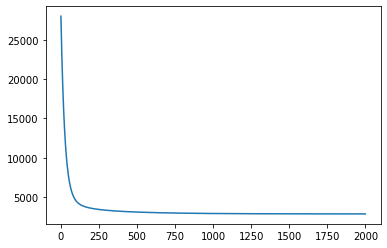

In [57]:
# (8) 하이퍼 파라미터인 학습률 설정하기
# 학습률, learning rate 를 설정해주세요
# 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.
LEARNING_RATE = 0.01

losses = []

for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 200 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

import matplotlib.pyplot as plt
plt.plot(losses)

In [58]:
# (10) test 데이터에 대한 성능 확인하기
W, b

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

# 변수 10개인 경우 mse : 2959.3320369859503
# 변수 9개인 경우 mse : 2964.0
# 변수 8개인 경우 mse : 3102.9343478323563

2959.3320369859503

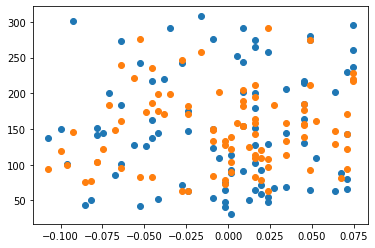

In [59]:
# 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# # 2-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [128]:
# (1) 데이터 가져오기
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows',500)
pd.set_option('max_columns',30)

train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')
#print(train.info(), test.info()) # casual, registered는 test 데이터에 없다      

In [129]:
# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

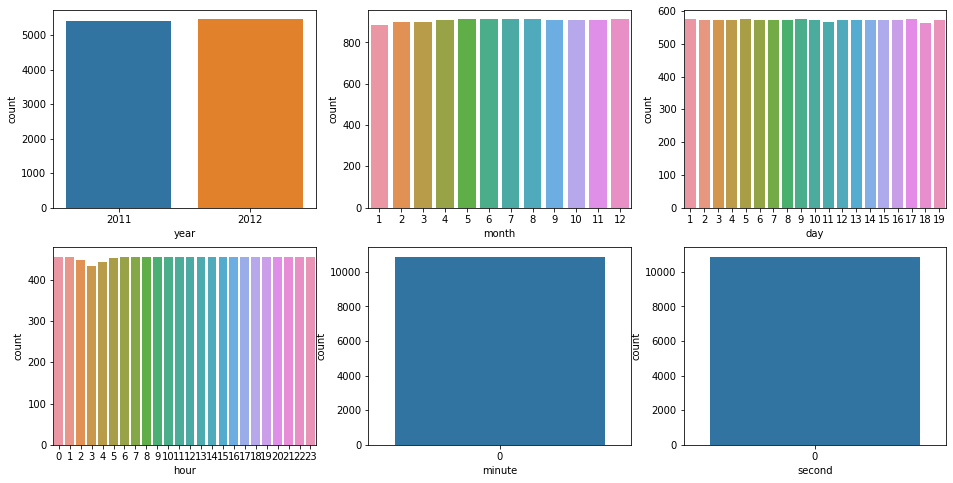

In [130]:
# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
fig, axs = plt.subplots(figsize=(16,8), ncols=3, nrows=2)
columns = ['year', 'month', 'day', 'hour', 'minute', 'second']

for i, column in enumerate(columns):
  row = int(i/3)
  col = i%3
  sns.countplot(x=column, data=train, ax=axs[row][col])

# 'minute', 'second'는 전부 0이기 때문에 삭제하기로 결정

# 변수간 상관관계 파악하기

In [131]:
# (4) X, y 컬럼 선택 및 train/test 데이터 분리

# 필요없는 컬럼 삭제
# 'casual', 'registered'는 count에 포함되기 때문에 삭제한다.
# minute, second 이 두 변수는 전부 값이 0이기 때문에 분석 대상으로 적절치 않으므로 삭제 예정
train.drop(columns = ['datetime','minute', 'second', 'casual', 'registered'], axis=1, inplace=True)

# 상관관계 출력
corr_bar = []
for column in train.columns[:] :
  
  print(f'{column}과 count의 상관관계 : {train["count"].corr(train[column])}\n')
  corr_bar.append(train["count"].corr(train[column]))

season과 count의 상관관계 : 0.16343901657636162

holiday과 count의 상관관계 : -0.005392984477774363

workingday과 count의 상관관계 : 0.011593866091574371

weather과 count의 상관관계 : -0.12865520103850622

temp과 count의 상관관계 : 0.39445364496724905

atemp과 count의 상관관계 : 0.38978443662697654

humidity과 count의 상관관계 : -0.31737147887659456

windspeed과 count의 상관관계 : 0.10136947021033277

count과 count의 상관관계 : 1.0

year과 count의 상관관계 : 0.2604032973783149

month과 count의 상관관계 : 0.16686223209772774

day과 count의 상관관계 : 0.019825777342373587

hour과 count의 상관관계 : 0.4006011941468474



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


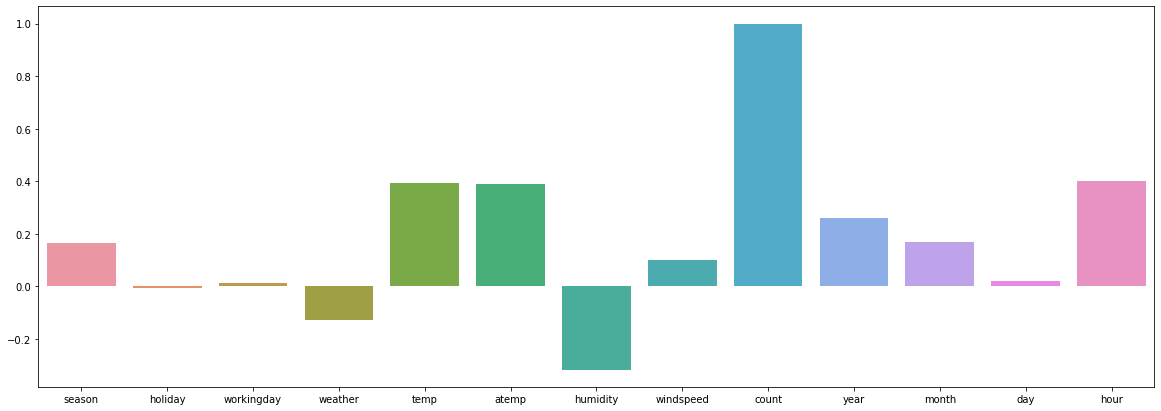

In [132]:
# count와 변수간 상관계수 시각화
plt.figure(figsize=(20,7))
sns.barplot(train.columns, corr_bar)

# 양의 상관관계 : season, temp, atemp, windspeed, year, month, day, hour
# 음의 상관관계 : weather, humidity

In [123]:
# 원핫 인코딩 또는 변수 삭제해보기
# pd.get_dummies(data = train, columns = ['season'], prefix = 'season')
# train.drop(columns = ['holiday', 'workingday'], axis=1, inplace=True)

In [133]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [134]:
#  X, y 컬럼 선택 및 train/test 데이터 분리
train = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'count']]

X = train.iloc[:, :-1]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=10)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# (8708, 12) (2178, 12) (8708,) (2178,)

(8708, 12) (2178, 12) (8708,) (2178,)


In [135]:
# (5) LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [136]:
# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))

MSE : 20826.994, RMSE : 144.316


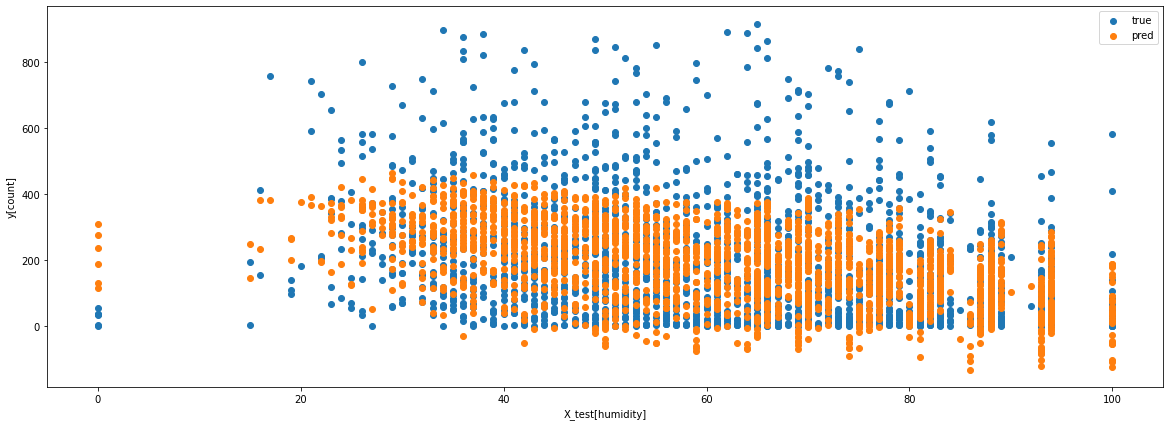

In [137]:
# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
# x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.figure(figsize=(20,7))
plt.scatter(X_test['humidity'], y_test, label="true")
plt.xlabel('X_test[humidity]')
plt.scatter(X_test['humidity'], y_pred, label="pred")
plt.ylabel('y[count]')
plt.legend()
plt.show()

# 회고

1. 이번 프로젝트에서 어려웠던 점
 
 (1) 프로젝트1에서 손실함수를 줄이려 다양한 시도를 했지만 2800대에서 더 줄어들지 않았습니다. 학습률 조절 이외에 다른 방법을 더 찾아봐야겠습니다.

 (2) 프로젝트2에서 rmse를 낮추기위해 변수 간 상관관계를 출력하고 변수를 선택해봤지만 rmse가 144 > 143으로 낮아진게 전부였습니다. 향후 다른 방법을 찾아봐야겠습니다.

2. 프로젝트를 진행하면서 알게된 부분 또는 아직 이해하지 못한 부분

(1) 이번 프로젝트를 진행하면서 상관계수를 참고하여 변수를 선택하면 RMSE에 영향을 줄 수 있다는 것을 알게됐습니다.

(2) 프로젝트 1번같은 경우 LOSS값을 낮출 방법을 아직은 잘 모르지만 더 찾아보도록 하겠습니다.


참조

(1) [머신러닝 완벽 가이드](http://www.kyobobook.co.kr/product/detailViewKor.laf?ejkGb=KOR&mallGb=KOR&barcode=9791158393229&orderClick=LEa&Kc=) (저자 : 권철민 / 참고한 내용 : 프로젝트2 그래프 여러개 그리기 / 참고한 페이지 : 355~356p)

(2) [프로젝트2 상관계수 시각화](https://wikidocs.net/92095)